In [3]:
import pandas as pd 
import requests 
import re 
import numpy as np
import json
import pickle
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
import dateutil.relativedelta

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Research
%ls

In [ ]:
WaterHeaters = pd.read_csv('Water_Heaters_2021-3-11_18-39-46.csv')
#print(WaterHeaters.columns)

types = WaterHeaters['Type_of_Heater_s'].unique()

for type in types:
  wh = WaterHeaters[WaterHeaters.Type_of_Heater_s == str(type)]
  wh1 = wh[wh.Uniform_Energy_Factor__UEF__d	>=2]
  wh2 = wh[wh.Uniform_Energy_Factor__UEF__d	<2]
  
  if type == "Electric Storage Water Heater":
    print(f" Energy Star Average Energy Factor {round(wh1['Uniform_Energy_Factor__UEF__d'].mean(),2)}")
    print(f" Standard Appliance Average Energy Factor {round(wh2['Uniform_Energy_Factor__UEF__d'].mean(),2)}")
    sns.histplot(wh['Uniform_Energy_Factor__UEF__d'], bins=25, label = str(type))
    plt.show()
    plt.legend()
  elif type == 'Instantaneous Electric Water Heater':
    print(f" Average Energy Factor {round(wh['Uniform_Energy_Factor__UEF__d'].mean(),2)}")
    sns.histplot(wh['Uniform_Energy_Factor__UEF__d'], bins=25, label = str(type))
    plt.show()
    plt.legend()
  

In [ ]:
Washers = pd.read_csv('Clothes_Washers_2021-3-11_20-45-30.csv')
Washers.columns

In [ ]:
# api-endpoint 
url = "https://data.energystar.gov/resource/bghd-e2wd.json"
  
pd_id = 2342279

# set the parameters to be sent to the API
params = {'pd_id': pd_id}

resp = requests.get(url)
cwasher = resp.json()

cw = pd.read_json(json.dumps(cwasher))
cw[0:1]
# Function for converting date in PJM mix to datetime object
def mdy(date_column):
  date_col = []
  for d in date_column:
    date_time_obj = datetime.datetime.fromisoformat(d)
    date_col.append(date_time_obj)
  return date_col
better_date = mdy(cw['date_qualified'])
cw['date_qualified'] = better_date
cw.sort_values(by=['date_qualified'], ascending = True, inplace=True)
cw = cw.reset_index(drop=True)
cw[0:1]

In [ ]:

sns.histplot(Washers['Integrated_Modified_Energy_Factor__cubic_feet_per_kilowatt_hour_per_cycle__d'], bins=25, label = 'IMEF')
plt.legend()
plt.show()
sns.histplot(Washers['Integrated_Water_Factor__gallons_per_cycle_per_cubic_foot__d'], bins=25, label = 'IWF')
plt.legend()

In [ ]:
df.head()

,pd_id,brand_name,model_number,additional_model_information,upc,load_configuration,additional_washer_features,intended_market,volume_cubic_feet,integrated_modified_energy_factor_imef,us_federal_standard_imef,annual_energy_use_kwh_year,integrated_water_factor_iwf,us_federal_standard_iwf,annual_water_use_gallons_year,connected,connects_using,communication_standard_application_layer,direct_on_premises_open_standard_based_interconnection,paired_energy_star_clothes_dryer_available,paired_energy_star_clothes_dryer_energy_star_model_identifier,date_available_on_market,date_qualified,markets,energy_star_model_identifier,meets_most_efficient_criteria
1,2310439,Samsung,WF56H91**C*,,887276028286,Front Load,Other,Residential,5.6,2.80,1.84,130,2.8,4.7,4593,No,,,,No,,2014-10-15T00:00:00.000,2014-09-25,"United States, Canada",ES_1023593_WF56H91**C*_02092018060252_70172127,No
6,2310447,Samsung,WF56H91**A*,,887276963105,Front Load,Other,Residential,5.6,3.10,1.84,135,2.7,4.7,4429,No,,,,No,,2015-04-01T00:00:00.000,2015-02-16,"United States, Canada",ES_1023593_WF56H91**A*_02092018060252_70172127,Yes
7,2310446,Samsung,WF45H63**A*,,887276963020,Front Load,Other,Residential,4.5,2.80,1.84,110,3.0,4.7,3956,No,,,,No,,2015-04-01T00:00:00.000,2015-02-16,"United States, Canada",ES_1023593_WF45H63**A*_02092018060252_70172127,No
8,2310445,Samsung,WF45H61**A*,,887276963013,Front Load,None,Residential,4.5,2.76,1.84,118,3.2,4.7,4220,No,,,,No,,2015-04-01T00:00:00.000,2015-02-16,"United States, Canada",ES_1023593_WF45H61**A*_02092018060252_70172127,No
9,2310444,Samsung,WF42H50**A*,,887276962887,Front Load,Other,Residential,4.2,2.80,1.84,85,3.2,4.7,3927,No,,,,No,,2015-04-01T00:00:00.000,2015-02-16,"United States, Canada",ES_1023593_WF42H50**A*_02092018060252_70172127,No


<function matplotlib.pyplot.show>

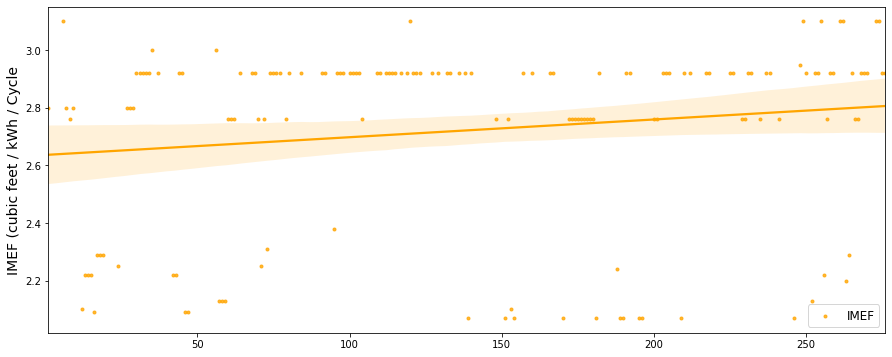

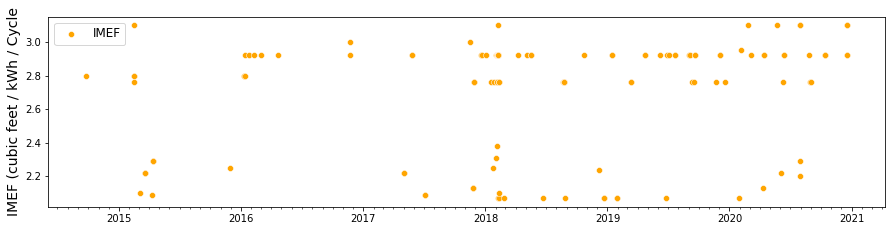

In [ ]:
df = cw.loc[(cw.load_configuration == 'Front Load')] 
fig, ax = plt.subplots(figsize = (15,6))
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

sns.regplot(x= df.index, y='integrated_modified_energy_factor_imef', color='orange', ax=ax, label = 'IMEF', data=df, marker='.')
ax.set_ylabel('IMEF (cubic feet / kWh / Cycle')
ax.set_xlabel('')
ax.legend()
plt.show


fig, ax = plt.subplots(figsize = (15,3.5))
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

#sns.lineplot(x='date_qualified', y='us_federal_standard_imef', color='black', ax=ax, label='federal standard', data=df)
sns.scatterplot(x= 'date_qualified', y='integrated_modified_energy_factor_imef', color='orange', ax=ax, label = 'IMEF', data=df)
# formatters' options
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_ylabel('IMEF (cubic feet / kWh / Cycle')
ax.set_xlabel('')
plt.show

129.39 annual average power (kWh)
4621.41  annual average water use (gal)


<function matplotlib.pyplot.show>

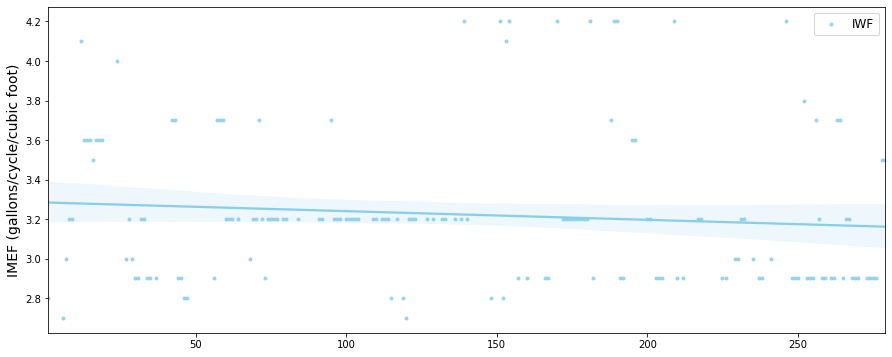

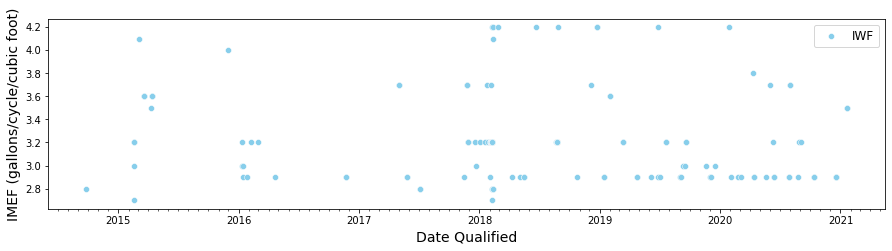

In [ ]:
AverageEnergy = cw['annual_energy_use_kwh_year'].mean()
print(round(AverageEnergy,2),"annual average power (kWh)")
AverageWaterUse = cw['annual_water_use_gallons_year'].mean()
print(round(AverageWaterUse,2)," annual average water use (gal)")

df = cw.loc[(cw.load_configuration == 'Front Load')] 
fig, ax = plt.subplots(figsize = (15,6))
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

sns.regplot(x= df.index, y='integrated_water_factor_iwf', color='skyblue', ax=ax, label = 'IWF', data=df, marker='.')
ax.set_ylabel('IMEF (gallons/cycle/cubic foot)')
ax.set_xlabel('')
ax.legend()
plt.show


fig, ax = plt.subplots(figsize = (15,3.5))
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 
#sns.lineplot(x='date_qualified', y='us_federal_standard_imef', color='black', ax=ax, label='federal standard', data=df)
sns.scatterplot(x= 'date_qualified', y='integrated_water_factor_iwf', color='skyblue', ax=ax, label = 'IWF', data=df)
# formatters' options
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.set_minor_locator(MonthLocator())
ax.set_ylabel('IMEF (gallons/cycle/cubic foot)')
ax.set_xlabel('Date Qualified')
plt.show

In [ ]:
fig, ax = plt.subplots()
cw.plot(x='date_qualified', y='integrated_water_factor_iwf', color='blue', figsize = (25,6), ax=ax)
cw.plot(x='date_qualified', y='us_federal_standard_iwf', color='blue', figsize = (25,6), ax=ax)
plt.show

In [ ]:

# api-endpoint 
url = "https://data.energystar.gov/resource/we7q-mgek.json"
  
pd_id = 2342279

# set the parameters to be sent to the API
params = {'pd_id': pd_id}

resp = requests.get(url)
wheater = resp.json()
wh = pd.read_json(json.dumps(wheater))
print(wh.columns)
print(wh['type'].unique())


In [ ]:
wh1 = wh[wh.fuel == 'Electric']
wh1 = wh1[['kwh_yr_at_125_f_outlet_temp','type', 'uniform_energy_factor_uef']]
wh1[20:25]


,kwh_yr_at_125_f_outlet_temp,type,uniform_energy_factor_uef
88,NaN,Hybrid/Electric Heat Pump,3.42
89,NaN,Hybrid/Electric Heat Pump,3.45
90,NaN,Hybrid/Electric Heat Pump,3.45
166,NaN,Hybrid/Electric Heat Pump,3.45
167,NaN,Hybrid/Electric Heat Pump,3.45


In [ ]:
AverageUEF = wh1['uniform_energy_factor_uef'].mean()
print(round(AverageUEF,2)," UEF average")

wh1.plot(y='uniform_energy_factor_uef', color='orange', marker = '*', linestyle = ' ')
plt.show


Coefficient of performance (COP) — This rating indicates a system’s heating efficiency. The higher the COP, the more efficiently the system heats. The rating is a ratio of heat produced (in Btu per hour) over electrical energy input. Simply stated, it indicates how much home heating you get for the amount of electrical energy the system uses to concentrate that heat. Geothermal heat pumps typically have COPs of 3 to 5.

Energy efficiency ratio (EER) — This number indicates a system’s cooling efficiency. A higher number means greater efficiency. The number is a ratio of the heat removed from your home (in Btu per hour) over the amount of electricity (in watts) the system uses. The average geothermal system has an EER of between 13 and 18. Although geothermal system efficiency is higher than that of most conventional heating and cooling systems, it’s still worth looking for the most efficient model among the geothermal systems available.

In [27]:

# api-endpoint 
url = 'https://data.energystar.gov/resource/6rww-hpns.json'
  
pd_id = 2342279

# set the parameters to be sent to the API
params = {'pd_id': pd_id}

resp = requests.get(url)
wheater = resp.json()
gt = pd.read_json(json.dumps(wheater))
#['Natural Gas', 'Natural Gas,Propane Gas', 'Propane Gas', 'Oil']
print(gt.groupby('fuel_type').count())

gt

                         pd_id  ...  meets_most_efficient_criteria
fuel_type                       ...                               
Natural Gas                 57  ...                             57
Natural Gas,Propane Gas    640  ...                            640
Oil                        188  ...                            188
Propane Gas                 27  ...                             27

[4 rows x 14 columns]


,pd_id,energy_star_partner,brand_name,model_name,model_number,additional_model_information,product_type,fuel_type,efficiency_afue,date_available_on_market,date_qualified,markets,energy_star_model_identifier,can_integrate_hot_water_heating,meets_most_efficient_criteria
0,2313318,"Ariston Thermo USA, LLC",Westinghouse,Combi,WBRCNG199W,,Boiler,Natural Gas,95,2017-09-28T00:00:00.000,2018-03-23T00:00:00.000,"United States, Canada",ES_29975_WBRCNG199W_03232018171701_5740897,Yes,Yes
1,2313299,"Ariston Thermo USA, LLC",Westinghouse,Premier,WBRE**080,,Boiler,"Natural Gas,Propane Gas",96,2016-01-28T00:00:00.000,2018-03-23T00:00:00.000,"United States, Canada",ES_29975_WBRE**080_03232018170040_9702004,No,Yes
2,2313300,"Ariston Thermo USA, LLC",Westinghouse,Premier,WBRE**110,,Boiler,"Natural Gas,Propane Gas",96,2016-11-25T00:00:00.000,2018-03-23T00:00:00.000,"United States, Canada",ES_29975_WBRE**110_03232018170042_7815413,No,Yes
3,2313301,"Ariston Thermo USA, LLC",Westinghouse,Premier,WBRE**150,,Boiler,"Natural Gas,Propane Gas",95,2016-01-19T00:00:00.000,2018-03-23T00:00:00.000,"United States, Canada",ES_29975_WBRE**150_03232018170044_6800875,No,Yes
4,2313302,"Ariston Thermo USA, LLC",Westinghouse,Premier,WBRE**220,,Boiler,"Natural Gas,Propane Gas",95,2016-01-20T00:00:00.000,2018-03-23T00:00:00.000,"United States, Canada",ES_29975_WBRE**220_03232018170046_6135000,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2360782,"U.S. Boiler Company, Inc.",PurePro,AO,AOT-3-075E,,Boiler,Oil,87,2020-06-01T00:00:00.000,2020-05-27T00:00:00.000,United States,ES_23449_AOT-3-075E_04232020013444_4525084,Yes,No
908,2360783,"U.S. Boiler Company, Inc.",PurePro,AO,AOT-4-120E,,Boiler,Oil,87,2020-06-01T00:00:00.000,2020-05-27T00:00:00.000,United States,ES_23449_AOT-4-120E_04232020013443_4364779,Yes,No
909,2360787,"U.S. Boiler Company, Inc.",RAND & REARDON BOILER WORKS,RRO,RRO-3-092E,,Boiler,Oil,87,2020-06-01T00:00:00.000,2020-05-27T00:00:00.000,United States,ES_23449_RRO-3-092E_04232020013442_4374135,No,No
910,2360781,"U.S. Boiler Company, Inc.",RAND & REARDON BOILER WORKS,RRO,RRO-3C-092E,,Boiler,Oil,87,2020-06-01T00:00:00.000,2020-05-27T00:00:00.000,United States,ES_23449_RRO-3C-092E_04232020013444_9939846,Yes,No
